In [187]:
import numpy as np
import xarray as xr
import csv
import pandas as pd
import os
import netCDF4 as nc4
import sys

#import functions_py.fates_xarray_functions as fa

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import cm
import matplotlib.colors as mcolors
from matplotlib.colors import BoundaryNorm

import matplotlib as mpl

import xarray_funcs as xf

In [188]:
pftnames = ["broadleaf_evergreen_tropical_tree",
           # "needleaf_evergreen_extratop_tree1",
  "needleleaf_evergreen_extratrop_tree",
  "needleleaf_colddecid_extratrop_tree",
  "broadleaf_evergreen_extratrop_tree",
  "broadleaf_hydrodecid_tropical_tree",
  "broadleaf_colddecid_extratrop_tree",
  "broadleaf_evergreen_extratrop_shrub",
  "broadleaf_hydrodecid_extratrop_shrub",
  "broadleaf_colddecid_extratrop_shrub",
  " broadleaf_evergreen_arctic_shrub",
  " broadleaf_colddecid_arctic_shrub",
  "arctic_c3_grass",
  "cool_c3_grass",
  "c4_grass"]

In [189]:
# default 
fates_file = '/datalake/NS9188K/share/jessien/feb26/noresm-fates_f45_2000s_single_ent_szpf_restart.2026-02-02/run/noresm-fates_f45_2000s_single_ent_szpf_restart.2026-02-02.2200s.nc'
fates = xr.open_dataset(fates_file, decode_times=False)

#hyytiala
fates = fates.sel(lat=61.7277486910994, lon=23.75, method='nearest')

# Badagongshan
#fates = fates.sel(lat=29.77, lon = 110.0, method='nearest')

In [190]:
cohort_size_bins = fates['fates_levscls'][:]
nsizebins = len(cohort_size_bins)
patch_age_bins = fates['fates_levage'][:]


### Aboveground biomass by size

In [191]:
agb_szpf = xf.scpf_to_scls_by_pft(fates['FATES_VEGC_ABOVEGROUND_SZPF'], fates)


In [192]:
# which tree pfts are non-zero
agb_pft = agb_szpf.sum(dim='fates_levscls').mean(dim='time').values
pfts = np.where(agb_pft > 0)[0].tolist()

print(pfts)

npfts = len(pfts)
ncols = 3
nrows = int(np.ceil(npfts / ncols))

pftnames
pftnames = [pftnames[i] for i in pfts]

[1, 5, 12]


Text(0.5, 0.01, 'Time (years)')

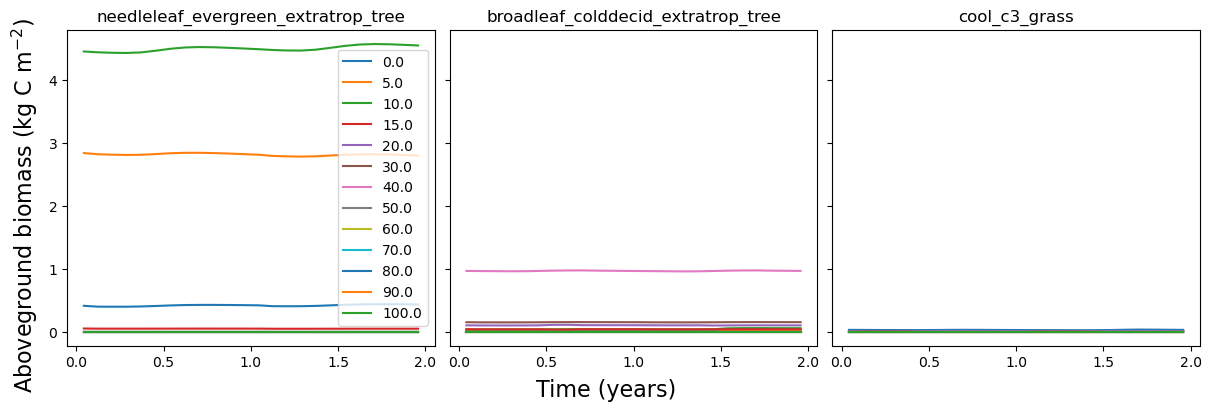

In [193]:
fig1, axs = plt.subplots(nrows = nrows, ncols = ncols, figsize=(12,4), sharey=True, constrained_layout=True)
axs = axs.flatten()

time = fates['time'] / 365.

for i in range(0,npfts):
    pft = pfts[i]
    for j in range(0,len(cohort_size_bins)):
        axs[i].plot(time, agb_szpf.isel(fates_levpft=pft).isel(fates_levscls=j), label=cohort_size_bins.values[j])
    axs[i].set_title(pftnames[i])    
    if i == 0:
        axs[i].legend()

fig1.supylabel('Aboveground biomass (kg C m$^{-2}$)', fontsize=16)
fig1.supxlabel('Time (years)', fontsize=16)


### Nplant by size

In [194]:
nplant_szpf = xf.scpf_to_scls_by_pft(fates['FATES_NPLANT_CANOPY_SZPF'], fates) + xf.scpf_to_scls_by_pft(fates['FATES_NPLANT_USTORY_SZPF'], fates)

Text(0.5, 0.01, 'Time (years)')

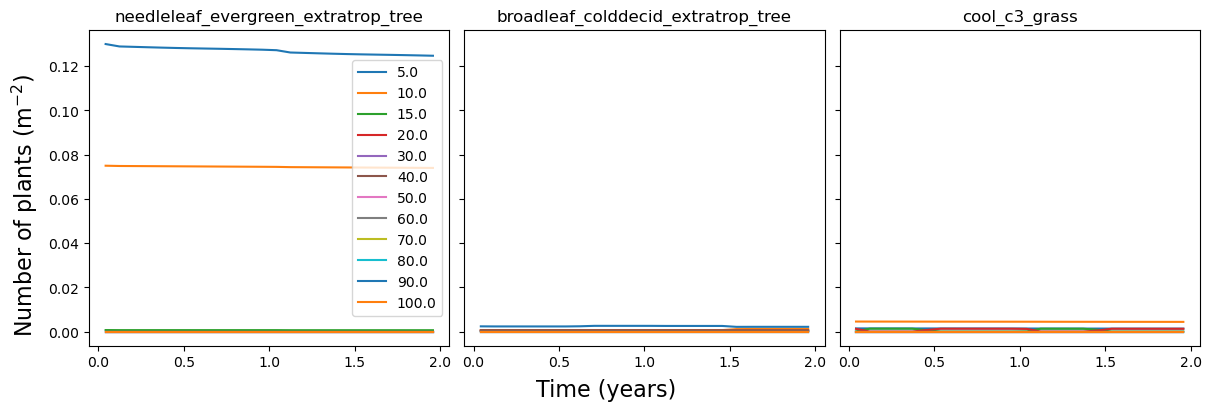

In [195]:
fig1, axs = plt.subplots(nrows = nrows, ncols = ncols, figsize=(12,4), sharey=True, constrained_layout=True)
axs = axs.flatten()

time = fates['time'] / 365.

for i in range(0,npfts):
    pft = pfts[i]
    for j in range(1,len(cohort_size_bins)):
        axs[i].plot(time, nplant_szpf.isel(fates_levpft=pft).isel(fates_levscls=j), label=cohort_size_bins.values[j])
    axs[i].set_title(pftnames[i])    
    if i == 0:
        axs[i].legend()

fig1.supylabel('Number of plants (m$^{-2}$)', fontsize=16)
fig1.supxlabel('Time (years)', fontsize=16)


### Allocation 

In [196]:
leaf_alloc_szpf = xf.scpf_to_scls_by_pft(fates['FATES_LEAF_ALLOC_SZPF'], fates).sum(dim = 'fates_levscls').mean(dim='time')
seed_alloc_szpf = xf.scpf_to_scls_by_pft(fates['FATES_SEED_ALLOC_SZPF'], fates).sum(dim = 'fates_levscls').mean(dim='time')
froot_alloc_szpf = xf.scpf_to_scls_by_pft(fates['FATES_FROOT_ALLOC_SZPF'], fates).sum(dim = 'fates_levscls').mean(dim='time')
bgsapwood_alloc_szpf = xf.scpf_to_scls_by_pft(fates['FATES_BGSAPWOOD_ALLOC_SZPF'], fates).sum(dim = 'fates_levscls').mean(dim='time')
bgstruct_alloc_szpf = xf.scpf_to_scls_by_pft(fates['FATES_BGSTRUCT_ALLOC_SZPF'], fates).sum(dim = 'fates_levscls').mean(dim='time')
agsapwood_alloc_szpf = xf.scpf_to_scls_by_pft(fates['FATES_AGSAPWOOD_ALLOC_SZPF'], fates).sum(dim = 'fates_levscls').mean(dim='time')
agstruct_alloc_szpf = xf.scpf_to_scls_by_pft(fates['FATES_AGSTRUCT_ALLOC_SZPF'], fates).sum(dim = 'fates_levscls').mean(dim='time')
store_alloc_szpf = xf.scpf_to_scls_by_pft(fates['FATES_STORE_ALLOC_SZPF'], fates).sum(dim = 'fates_levscls').mean(dim='time')

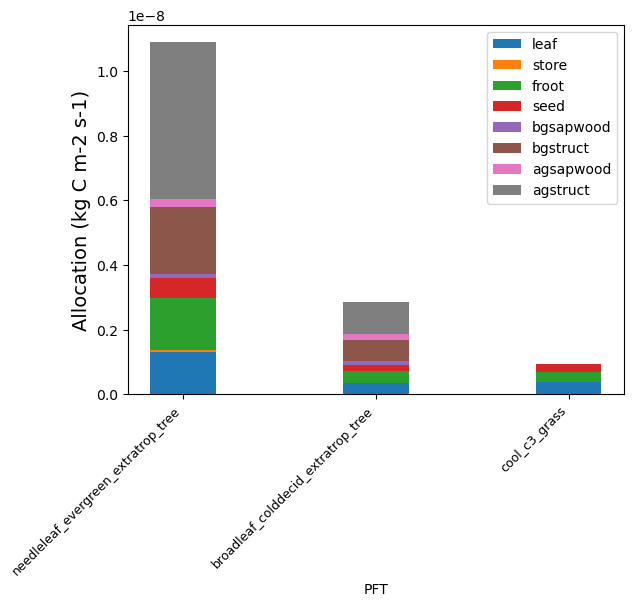

In [197]:
# Make a bar plot of allocation 

leaf_allocs = leaf_alloc_szpf.isel(fates_levpft=pfts)
store_allocs = store_alloc_szpf.isel(fates_levpft=pfts)
froot_allocs = froot_alloc_szpf.isel(fates_levpft=pfts)
bgsapwood_allocs = bgsapwood_alloc_szpf.isel(fates_levpft=pfts)
bgstruct_allocs = bgstruct_alloc_szpf.isel(fates_levpft=pfts)       
agsapwood_allocs = agsapwood_alloc_szpf.isel(fates_levpft=pfts)
agstruct_allocs = agstruct_alloc_szpf.isel(fates_levpft=pfts)       
seed_allocs = seed_alloc_szpf.isel(fates_levpft=pfts)

xpos = range(len(pftnames))

width = 0.34

fig, ax=plt.subplots()

leaf = ax.bar(xpos, leaf_allocs, width, label = 'leaf')
store = ax.bar(xpos, store_allocs, width, label = 'store', bottom=leaf_allocs)
froot = ax.bar(xpos, froot_allocs, width, label = 'froot', bottom = np.array(leaf_allocs) + np.array(store_allocs))
seed = ax.bar(xpos, seed_allocs, width, label = 'seed', bottom=np.array(leaf_allocs) + np.array(store_allocs) + np.array(froot_allocs))
bsapwood = ax.bar(xpos, bgsapwood_allocs, width, label='bgsapwood', bottom=np.array(leaf_allocs) + np.array(store_allocs) + np.array(froot_allocs) + np.array(seed_allocs))
bgstruct = ax.bar(xpos, bgstruct_allocs, width, label='bgstruct', bottom=np.array(leaf_allocs) + np.array(store_allocs) + np.array(froot_allocs) + np.array(seed_allocs) + np.array(bgsapwood_allocs))
asapwood = ax.bar(xpos, agsapwood_allocs, width, label='agsapwood', bottom=np.array(leaf_allocs) + np.array(store_allocs) + np.array(froot_allocs) + np.array(seed_allocs) + np.array(bgsapwood_allocs) + np.array(bgstruct_allocs))
agstruct = ax.bar(xpos, agstruct_allocs, width, label='agstruct', bottom=np.array(leaf_allocs) + np.array(store_allocs) + np.array(froot_allocs) + np.array(seed_allocs) + np.array(bgsapwood_allocs) + np.array(bgstruct_allocs) + np.array(agsapwood_allocs))

ax.set_ylabel('Allocation (kg C m-2 s-1)', fontsize=14)
ax.set_xlabel('PFT')
ax.set_xticks(xpos, pftnames, rotation=45, ha='right', fontsize=9) 
ax.legend()




In [198]:
nplant_szpf = xf.scpf_to_scls_by_pft(fates['FATES_NPLANT_CANOPY_SZPF'], fates) + xf.scpf_to_scls_by_pft(fates['FATES_NPLANT_USTORY_SZPF'], fates)

In [199]:
leaf_alloc_szpf = (xf.scpf_to_scls_by_pft(fates['FATES_LEAF_ALLOC_SZPF'], fates)/nplant_szpf).mean(dim='time')
store_alloc_szpf = (xf.scpf_to_scls_by_pft(fates['FATES_STORE_ALLOC_SZPF'], fates)/nplant_szpf).mean(dim='time')
froot_alloc_szpf = (xf.scpf_to_scls_by_pft(fates['FATES_FROOT_ALLOC_SZPF'], fates)/nplant_szpf).mean(dim='time')
bgsapwood_alloc_szpf = (xf.scpf_to_scls_by_pft(fates['FATES_BGSAPWOOD_ALLOC_SZPF'], fates)/nplant_szpf).mean(dim='time')
bgstruct_alloc_szpf = (xf.scpf_to_scls_by_pft(fates['FATES_BGSTRUCT_ALLOC_SZPF'], fates)/nplant_szpf).mean(dim='time')       
agsapwood_alloc_szpf = (xf.scpf_to_scls_by_pft(fates['FATES_AGSAPWOOD_ALLOC_SZPF'], fates)/nplant_szpf).mean(dim='time')
agstruct_alloc_szpf = (xf.scpf_to_scls_by_pft(fates['FATES_AGSTRUCT_ALLOC_SZPF'], fates)/nplant_szpf).mean(dim='time')       
seed_alloc_szpf = (xf.scpf_to_scls_by_pft(fates['FATES_SEED_ALLOC_SZPF'], fates)/nplant_szpf).mean(dim='time')

range(0, 13)


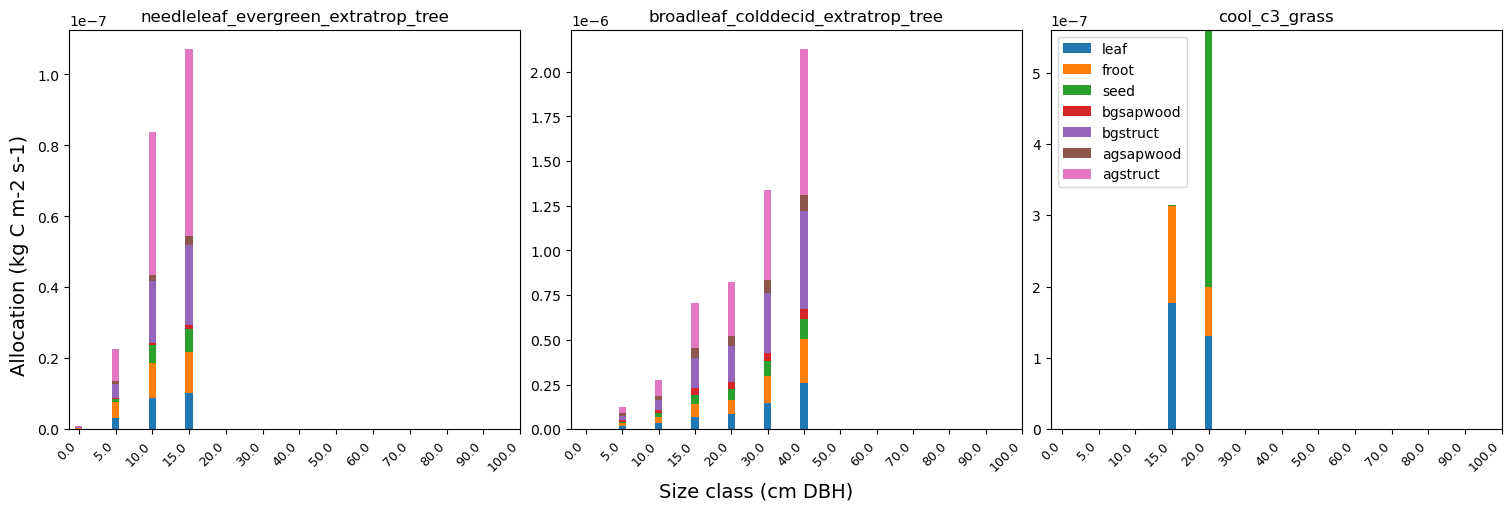

In [200]:
xpos = range(len(cohort_size_bins))
print(xpos)
labels = cohort_size_bins.values
width = 0.2

fig1, axs = plt.subplots(nrows = nrows, ncols = ncols, figsize=(15,5), constrained_layout=True)
axs = axs.flatten()


for i in range(0,npfts):
    pft = pfts[i]
    ax = axs[i]

    
    leaf = ax.bar(xpos, leaf_alloc_szpf.isel(fates_levpft=pft), width, label = 'leaf')
    froot = ax.bar(xpos, froot_alloc_szpf.isel(fates_levpft=pft), width, label = 'froot', bottom = leaf_alloc_szpf.isel(fates_levpft=pft))
    seed = ax.bar(xpos, seed_alloc_szpf.isel(fates_levpft=pft), width, label = 'seed', bottom = leaf_alloc_szpf.isel(fates_levpft=pft) + froot_alloc_szpf.isel(fates_levpft=pft))
    bgsapw = ax.bar(xpos, bgsapwood_alloc_szpf.isel(fates_levpft=pft), width, label='bgsapwood', bottom=np.array(leaf_alloc_szpf.isel(fates_levpft=pft)) + np.array(froot_alloc_szpf.isel(fates_levpft=pft)) + np.array(seed_alloc_szpf.isel(fates_levpft=pft)))
    bgstruct = ax.bar(xpos, bgstruct_alloc_szpf.isel(fates_levpft=pft), width, label='bgstruct', bottom=np.array(leaf_alloc_szpf.isel(fates_levpft=pft)) + np.array(froot_alloc_szpf.isel(fates_levpft=pft)) + np.array(seed_alloc_szpf.isel(fates_levpft=pft)) + np.array(bgsapwood_alloc_szpf.isel(fates_levpft=pft)))
    asapwood = ax.bar(xpos, agsapwood_alloc_szpf.isel(fates_levpft=pft), width, label='agsapwood', bottom=np.array(leaf_alloc_szpf.isel(fates_levpft=pft)) + np.array(froot_alloc_szpf.isel(fates_levpft=pft)) + np.array(seed_alloc_szpf.isel(fates_levpft=pft)) + np.array(bgsapwood_alloc_szpf.isel(fates_levpft=pft)) + np.array(bgstruct_alloc_szpf.isel(fates_levpft=pft)))
    agstruct = ax.bar(xpos, agstruct_alloc_szpf.isel(fates_levpft=pft), width, label='agstruct', bottom=np.array(leaf_alloc_szpf.isel(fates_levpft=pft)) + np.array(froot_alloc_szpf.isel(fates_levpft=pft)) + np.array(seed_alloc_szpf.isel(fates_levpft=pft)) + np.array(bgsapwood_alloc_szpf.isel(fates_levpft=pft)) + np.array(bgstruct_alloc_szpf.isel(fates_levpft=pft)) + np.array(agsapwood_alloc_szpf.isel(fates_levpft=pft)))

    ax.set_xticks(xpos, labels, rotation=45, ha='right', fontsize=9) 
    ax.set_title(pftnames[i]) 

fig1.supylabel('Allocation (kg C m-2 s-1)', fontsize=14)
fig1.supxlabel('Size class (cm DBH)', fontsize=14)

ax.legend()


### Growth 

In [201]:
NPLANT_CANOPY_SZPF = xf.scpf_to_scls_by_pft(fates.FATES_NPLANT_CANOPY_SZPF, fates) 
NPLANT_USTORY_SZPF = xf.scpf_to_scls_by_pft(fates.FATES_NPLANT_USTORY_SZPF, fates)

DDBH_CANOPY_SZPF = xf.scpf_to_scls_by_pft(fates.FATES_DDBH_CANOPY_SZPF, fates) * 100 # convert to cm
DDBH_USTORY_SZPF = xf.scpf_to_scls_by_pft(fates.FATES_DDBH_USTORY_SZPF, fates) * 100 # convert to cm
MORT_CANOPY_SZPF = xf.scpf_to_scls_by_pft(fates.FATES_MORTALITY_CANOPY_SZPF, fates)
MORT_USTORY_SZPF = xf.scpf_to_scls_by_pft(fates.FATES_MORTALITY_USTORY_SZPF, fates)

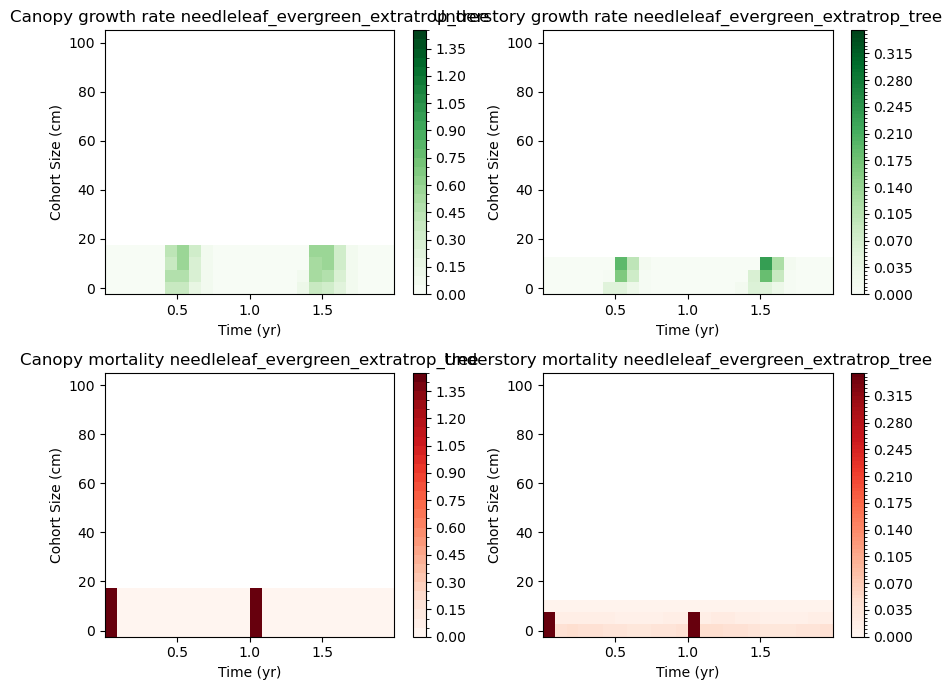

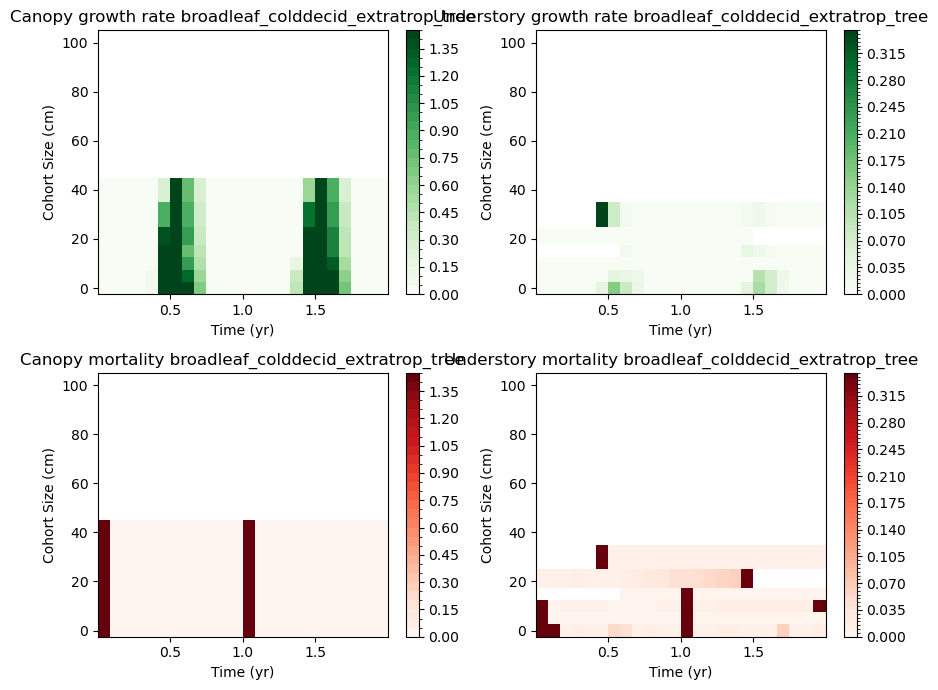

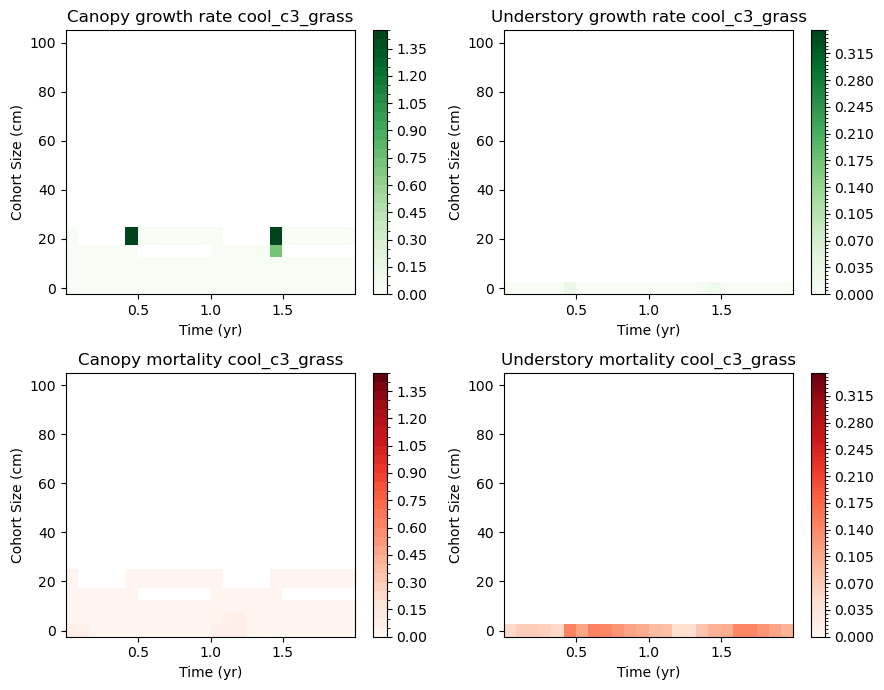

In [202]:
for i in range(0,npfts):
    pft = pfts[i]

    # set up the page
    fig3, ((f3ax0, f3ax1), (f3ax2, f3ax3)) = plt.subplots(nrows=2, ncols=2, figsize=(9, 7))

    ## set up the first plot: growth rate (in diameter increment) in the canopy
    levels = np.arange(0.,1.5, 0.05)
    cmap = plt.get_cmap('Greens')
    norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)
    im = f3ax0.pcolormesh(time, cohort_size_bins, np.squeeze(DDBH_CANOPY_SZPF.isel(fates_levpft=pft) / NPLANT_CANOPY_SZPF.isel(fates_levpft=pft)).transpose(), cmap=cmap, norm=norm)
    fig3.colorbar(im, ax=f3ax0)
    f3ax0.set_title(r'Canopy growth rate {}'.format(pftnames[i]))
    f3ax0.set_xlabel('Time (yr)')
    f3ax0.set_ylabel('Cohort Size (cm)')

    ## set up the second plot: growth rate in the understory, units as above
    levels = np.arange(0.,0.35, 0.005)
    cmap = plt.get_cmap('Greens')
    norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)
    im = f3ax1.pcolormesh(time, cohort_size_bins, np.squeeze(DDBH_USTORY_SZPF.isel(fates_levpft=pft) / NPLANT_USTORY_SZPF.isel(fates_levpft=pft)).transpose(), cmap=cmap, norm=norm)
    fig3.colorbar(im, ax=f3ax1)
    f3ax1.set_title(r'Understory growth rate {}'.format(pftnames[i]))
    f3ax1.set_xlabel('Time (yr)')
    f3ax1.set_ylabel('Cohort Size (cm)')

    levels = np.arange(0.,1.5, 0.05)
    cmap = plt.get_cmap('Reds')
    norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)
    im = f3ax2.pcolormesh(time, cohort_size_bins, np.squeeze(MORT_CANOPY_SZPF.isel(fates_levpft=pft) / NPLANT_CANOPY_SZPF.isel(fates_levpft=pft)).transpose(), cmap=cmap, norm=norm)
    fig3.colorbar(im, ax=f3ax2)
    f3ax2.set_title(r'Canopy mortality {}'.format(pftnames[i]))
    f3ax2.set_xlabel('Time (yr)')
    f3ax2.set_ylabel('Cohort Size (cm)')

    ## set up the second plot: growth rate in the understory, units as above
    levels = np.arange(0.,0.35, 0.005)
    cmap = plt.get_cmap('Reds')
    norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)
    im = f3ax3.pcolormesh(time, cohort_size_bins, np.squeeze(MORT_USTORY_SZPF.isel(fates_levpft=pft) / NPLANT_USTORY_SZPF.isel(fates_levpft=pft)).transpose(), cmap=cmap, norm=norm)
    fig3.colorbar(im, ax=f3ax3)
    f3ax3.set_title(r'Understory mortality {}'.format(pftnames[i]))
    f3ax3.set_xlabel('Time (yr)')
    f3ax3.set_ylabel('Cohort Size (cm)')

    fig3.tight_layout()

### Sources of mortality 

In [203]:
nplant_szpf = xf.scpf_to_scls_by_pft(fates['FATES_NPLANT_CANOPY_SZPF'], fates) + xf.scpf_to_scls_by_pft(fates['FATES_NPLANT_USTORY_SZPF'], fates)

In [204]:
tmort_szpf = xf.scpf_to_scls_by_pft(fates['FATES_MORTALITY_TERMINATION_SZPF'], fates)
tmort_szpf = tmort_szpf / nplant_szpf

imort_szpf = xf.scpf_to_scls_by_pft(fates['FATES_MORTALITY_IMPACT_SZPF'], fates)
imort_szpf = imort_szpf / nplant_szpf

cstarv_szpf = xf.scpf_to_scls_by_pft(fates['FATES_MORTALITY_CSTARV_SZPF'], fates)
cstarv_szpf = cstarv_szpf / nplant_szpf

hydro_szpf = xf.scpf_to_scls_by_pft(fates['FATES_MORTALITY_HYDRAULIC_SZPF'], fates)
hydro_szpf = hydro_szpf / nplant_szpf

bmort_szpf = xf.scpf_to_scls_by_pft(fates['FATES_MORTALITY_BACKGROUND_SZPF'], fates)
bmort_szpf = bmort_szpf / nplant_szpf

smort_szpf = xf.scpf_to_scls_by_pft(fates['FATES_MORTALITY_SENESCENCE_SZPF'], fates)
smort_szpf = smort_szpf / nplant_szpf
    
fmort_szpf = xf.scpf_to_scls_by_pft(fates['FATES_MORTALITY_FREEZING_SZPF'], fates)
fmort_szpf = fmort_szpf / nplant_szpf

lmort_szpf = xf.scpf_to_scls_by_pft(fates['FATES_MORTALITY_LOGGING_SZPF'], fates)
lmort_szpf = lmort_szpf / nplant_szpf



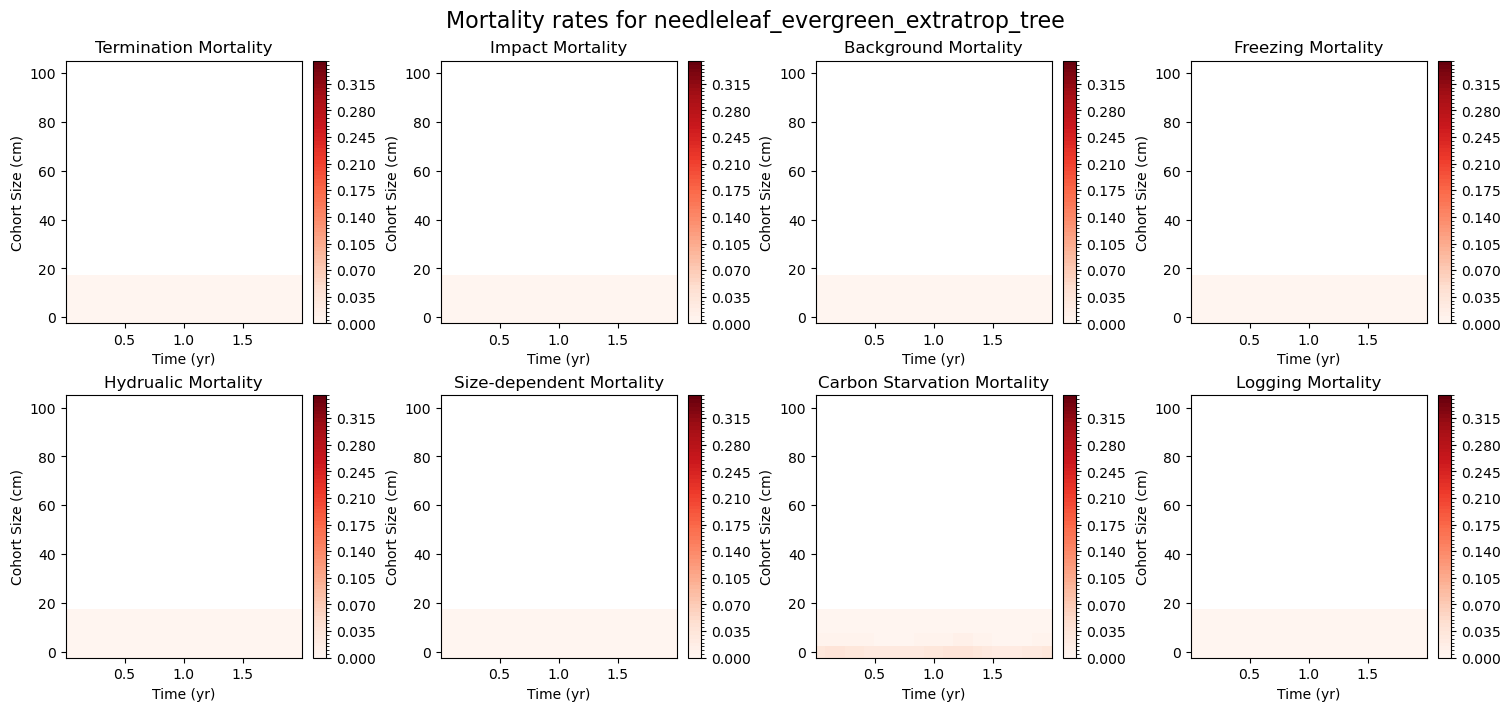

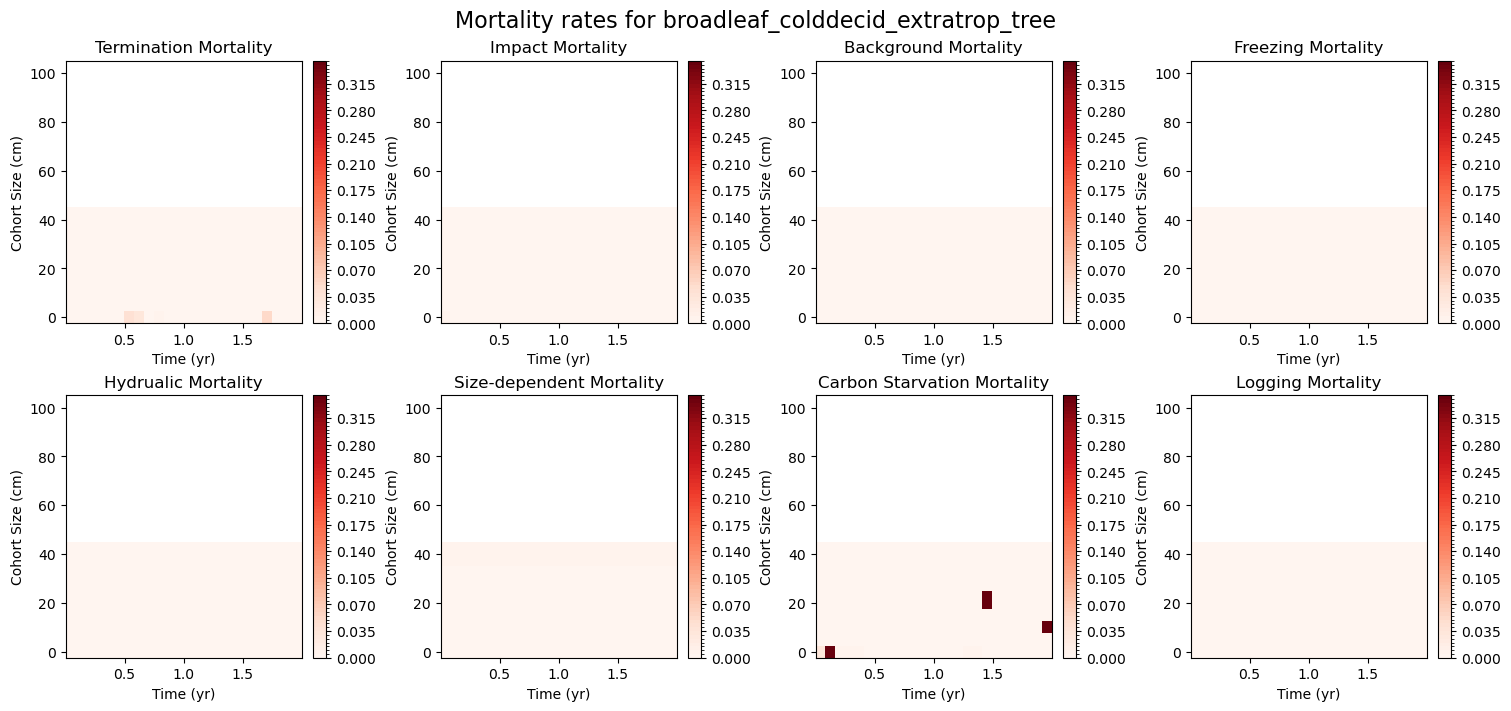

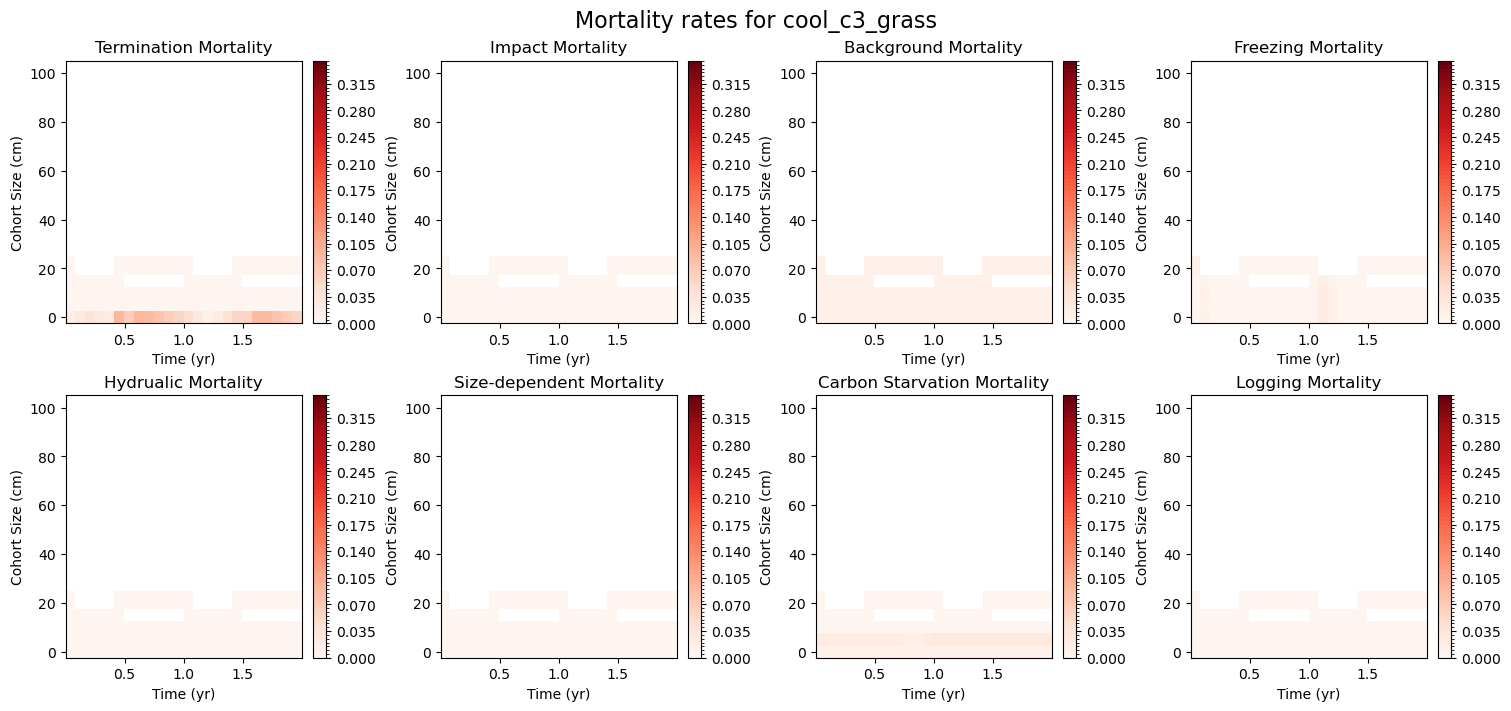

In [205]:
for i in range(0,npfts):
    pft = pfts[i]

    # set up the page
    fig1, axs = plt.subplots(nrows = 2, ncols = 4, figsize=(15,7), constrained_layout=True)
    axs = axs.flatten()

    cmap = plt.get_cmap('Reds')
    norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)
    im = axs[0].pcolormesh(time, cohort_size_bins, np.squeeze(tmort_szpf.isel(fates_levpft=pft)).transpose(), cmap=cmap, norm=norm)
    fig1.colorbar(im, ax=axs[0])
    axs[0].set_title(r'Termination Mortality')
    axs[0].set_xlabel('Time (yr)')
    axs[0].set_ylabel('Cohort Size (cm)')

    norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)
    im = axs[1].pcolormesh(time, cohort_size_bins, np.squeeze(imort_szpf.isel(fates_levpft=pft)).transpose(), cmap=cmap, norm=norm)
    fig1.colorbar(im, ax=axs[1])
    axs[1].set_title(r'Impact Mortality')
    axs[1].set_xlabel('Time (yr)')
    axs[1].set_ylabel('Cohort Size (cm)')

    norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)
    im = axs[2].pcolormesh(time, cohort_size_bins, np.squeeze(bmort_szpf.isel(fates_levpft=pft)).transpose(), cmap=cmap, norm=norm)
    fig1.colorbar(im, ax=axs[2])
    axs[2].set_title(r'Background Mortality')
    axs[2].set_xlabel('Time (yr)')
    axs[2].set_ylabel('Cohort Size (cm)')

    norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)
    im = axs[3].pcolormesh(time, cohort_size_bins, np.squeeze(fmort_szpf.isel(fates_levpft=pft)).transpose(), cmap=cmap, norm=norm)
    fig1.colorbar(im, ax=axs[3])
    axs[3].set_title(r'Freezing Mortality')
    axs[3].set_xlabel('Time (yr)')
    axs[3].set_ylabel('Cohort Size (cm)')

    norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)
    im = axs[4].pcolormesh(time, cohort_size_bins, np.squeeze(hydro_szpf.isel(fates_levpft=pft)).transpose(), cmap=cmap, norm=norm)
    fig1.colorbar(im, ax=axs[4])
    axs[4].set_title(r'Hydrualic Mortality')
    axs[4].set_xlabel('Time (yr)')
    axs[4].set_ylabel('Cohort Size (cm)')

    norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)
    im = axs[5].pcolormesh(time, cohort_size_bins, np.squeeze(smort_szpf.isel(fates_levpft=pft)).transpose(), cmap=cmap, norm=norm)
    fig1.colorbar(im, ax=axs[5])
    axs[5].set_title(r'Size-dependent Mortality')
    axs[5].set_xlabel('Time (yr)')
    axs[5].set_ylabel('Cohort Size (cm)')

    norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)
    im = axs[6].pcolormesh(time, cohort_size_bins, np.squeeze(cstarv_szpf.isel(fates_levpft=pft)).transpose(), cmap=cmap, norm=norm)
    fig1.colorbar(im, ax=axs[6])
    axs[6].set_title(r'Carbon Starvation Mortality')
    axs[6].set_xlabel('Time (yr)')
    axs[6].set_ylabel('Cohort Size (cm)')

    norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)
    im = axs[7].pcolormesh(time, cohort_size_bins, np.squeeze(lmort_szpf.isel(fates_levpft=pft)).transpose(), cmap=cmap, norm=norm)
    fig1.colorbar(im, ax=axs[7])
    axs[7].set_title(r'Logging Mortality')
    axs[7].set_xlabel('Time (yr)')
    axs[7].set_ylabel('Cohort Size (cm)')

    fig1.suptitle(r'Mortality rates for {}'.format(pftnames[i]), fontsize=16)